Akar ditemukan setelah 17 iterasi.


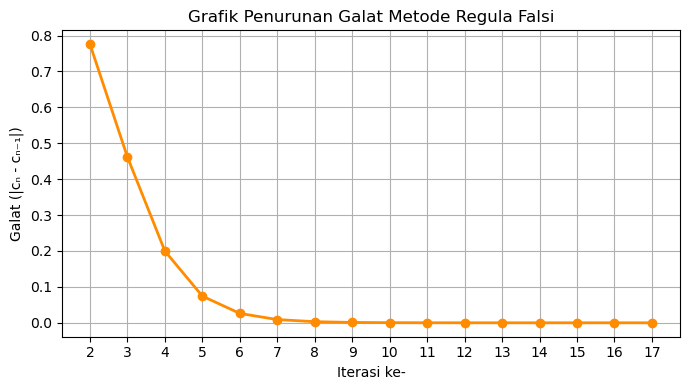


Akar dari f(x) = 0 adalah: -2.350780963486787


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def regula_falsi(fungsi, batas_bawah, batas_atas, toleransi=1e-6, iterasi_maks=100):
    if fungsi(batas_bawah) * fungsi(batas_atas) > 0:
        print("Tanda fungsi pada interval [a, b] sama. Tidak dapat diterapkan metode Regula Falsi.")
        return None, None
    
    hasil_iterasi = []  
    c_sebelumnya = None  
    
    for langkah in range(1, iterasi_maks + 1):
        # Rumus Regula Falsi (interpolasi linier)
        titik_tengah = batas_atas - (fungsi(batas_atas) * (batas_atas - batas_bawah)) / (fungsi(batas_atas) - fungsi(batas_bawah))
        nilai_tengah = fungsi(titik_tengah)
        
        # Hitung galat
        if c_sebelumnya is None:
            galat = None
        else:
            galat = abs(titik_tengah - c_sebelumnya)
        
        hasil_iterasi.append([langkah, galat])
        
        # Kondisi berhenti
        if abs(nilai_tengah) < toleransi:
            print(f"Akar ditemukan setelah {langkah} iterasi.")
            break

        # Update batas interval
        if fungsi(titik_tengah) * fungsi(batas_bawah) < 0:
            batas_atas = titik_tengah
        else:
            batas_bawah = titik_tengah
        
        c_sebelumnya = titik_tengah

    # Buat DataFrame hasil iterasi
    df = pd.DataFrame(hasil_iterasi, columns=["Iterasi", "Galat"])
    
    # Hapus baris pertama (karena galat None di iterasi 1)
    df = df.dropna().reset_index(drop=True)
    
    # --- BAGIAN GRAFIK ---
    plt.figure(figsize=(7, 4))
    plt.plot(df["Iterasi"], df["Galat"], marker='o', color='darkorange', linewidth=2)
    plt.title("Grafik Penurunan Galat Metode Regula Falsi")
    plt.xlabel("Iterasi ke-")
    plt.ylabel("Galat (|cₙ - cₙ₋₁|)")
    plt.grid(True)
    plt.xticks(df["Iterasi"])
    plt.tight_layout()
    plt.show()
    
    return titik_tengah, df


# Contoh fungsi uji
def fungsi(x):
    return 2*x**2 + 3*x - 4

# Batas interval
batas_bawah = -4
batas_atas = 0

akar, df_regula = regula_falsi(fungsi, batas_bawah, batas_atas)
print("\nAkar dari f(x) = 0 adalah:", akar)
